## Malaria-Detection-Using-VGG19 -Transfer Learning

In [14]:
#importing the Libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Test'


In [17]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [18]:
# Don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Train/*')

In [20]:
folders

['/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Train/Uninfected',
 '/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Train/Parasite']

In [21]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [23]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [28]:
training_set

In [29]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
13/13 [==============================] - 135s 10s/step - loss: 1.4980 - accuracy: 0.4880 - val_loss: 1.4001 - val_accuracy: 0.3731
Epoch 2/2
13/13 [==============================] - 8s 630ms/step - loss: 0.6268 - accuracy: 0.7188 - val_loss: 0.5969 - val_accuracy: 0.6791


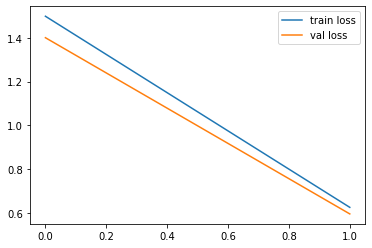

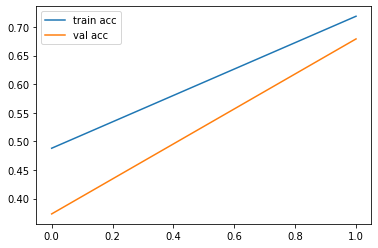

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [33]:

y_pred = model.predict(test_set)


In [34]:
y_pred

array([[0.9370286 , 0.0629714 ],
       [0.9882228 , 0.01177721],
       [0.91458225, 0.08541775],
       [0.6500015 , 0.3499985 ],
       [0.75022966, 0.24977037],
       [0.66731143, 0.33268857],
       [0.9550739 , 0.04492604],
       [0.7040761 , 0.29592386],
       [0.87574756, 0.12425249],
       [0.89441144, 0.10558859],
       [0.69425106, 0.3057489 ],
       [0.9951841 , 0.00481585],
       [0.8745356 , 0.12546435],
       [0.9507416 , 0.04925835],
       [0.7042841 , 0.29571596],
       [0.8039082 , 0.19609179],
       [0.7248965 , 0.2751035 ],
       [0.9982122 , 0.00178781],
       [0.97664136, 0.02335864],
       [0.63879734, 0.36120266],
       [0.91361356, 0.0863864 ],
       [0.97032654, 0.02967349],
       [0.9452886 , 0.05471142],
       [0.84647083, 0.15352917],
       [0.8491962 , 0.15080382],
       [0.95547044, 0.04452958],
       [0.85476035, 0.14523965],
       [0.9888566 , 0.01114344],
       [0.91693115, 0.08306883],
       [0.95650595, 0.043494  ],
       [0.

In [35]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
model=load_model('model_vgg19.h5')

In [39]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/Malaria Detection/Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [40]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[0.02928156, 0.97071844]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

In [46]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
